Proje Adı: Medical Cost Analysis

Ebubekir Tosun

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

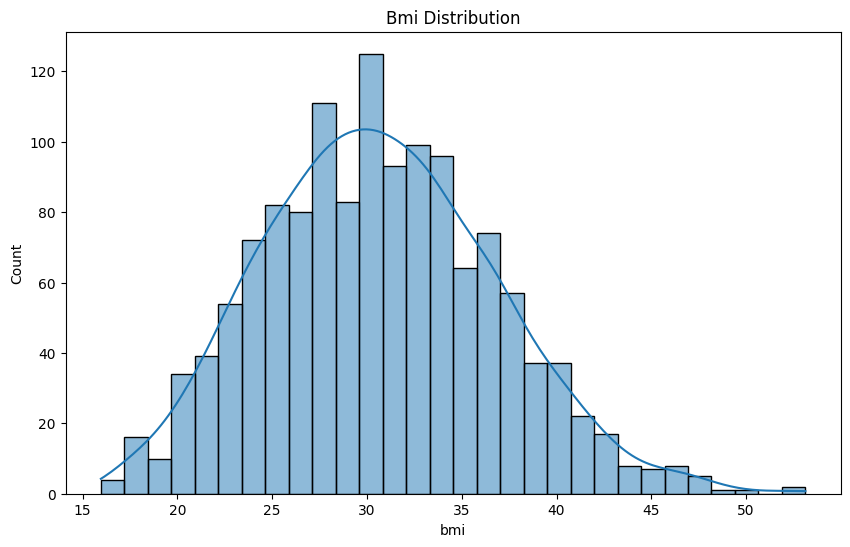

In [11]:
# Bmi'nin dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Bmi Distribution')
plt.show

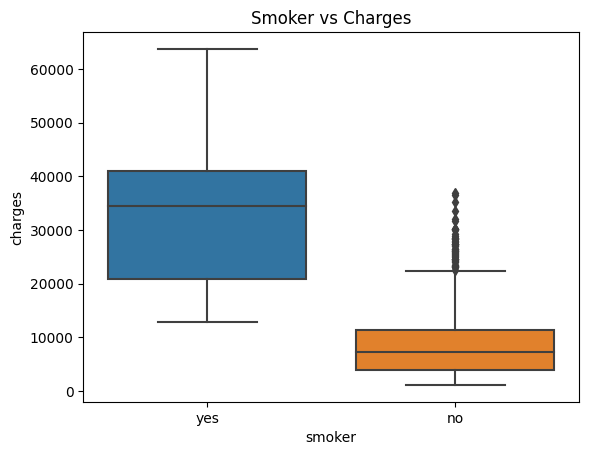

In [9]:
# Sigara içme durumu ile ücret arasındaki ilişki
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

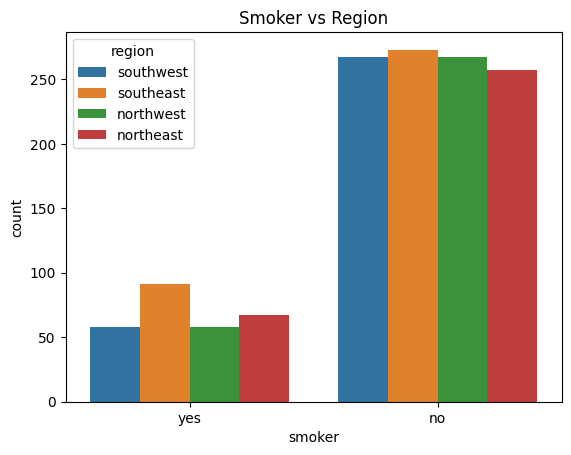

In [10]:
# Sigara içme durumu ve bölge ilişki
sns.countplot(x='smoker', hue='region', data=df)
plt.title('Smoker vs Region')
plt.show()

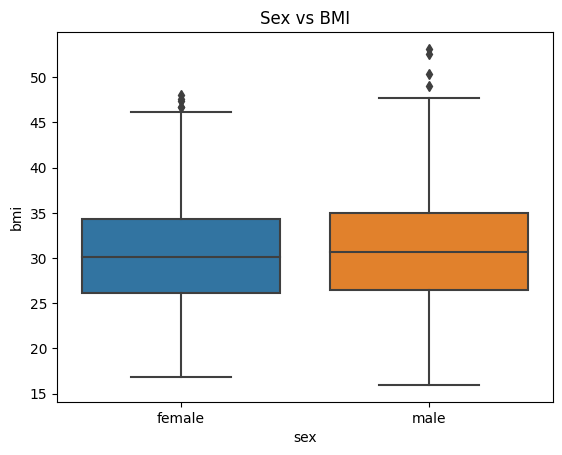

In [12]:
# Bmi ve cinsiyet ilişkisi
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Sex vs BMI')
plt.show()

In [14]:
# En fazla çocuğa sahip olan bölge
region_with_most_children = df.groupby('region')['children'].sum().idxmax()
print(f"Region with most children: {region_with_most_children}")

Region with most children: southeast


In [16]:
# Label Encoding ve One-Hot Encoding uygulandı.
data_encoded = pd.get_dummies(df, columns=['sex', 'region', 'smoker'], drop_first=True)

In [18]:
# Bağımsız ve bağımlı değişkenler ayrıldı.
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

In [21]:
# Veri eğitim ve test setlerine ayrıldı.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Veri ölçeklendirildi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Modeller

models = [
    ("Doğrusal Regresyon", LinearRegression()),
    ("Rastgele Orman Regresyonu", RandomForestRegressor())
]

In [32]:
# Modellerin Eğitilmesi

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE Scores:", rmse_scores)

Doğrusal Regresyon RMSE Scores: [6334.96905353 5663.6591115  5992.51101164 6825.71740716 5918.61313625]
Rastgele Orman Regresyonu RMSE Scores: [5037.62820468 4090.67709481 5160.38833032 5523.84430247 5060.56722849]


In [33]:
# Random Forest Regressor için hiper-parametre optimizasyonu
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [34]:
# En iyi model seçilerek test model üzerinde değerlendirildi.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19011034.407764528
Mean Absolute Error: 2478.678045710591
